# Camera Calibration

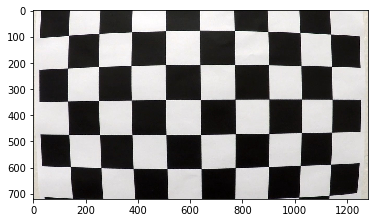

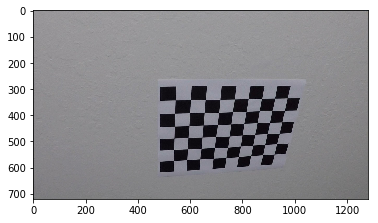

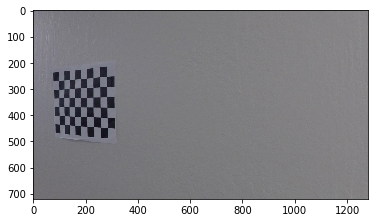

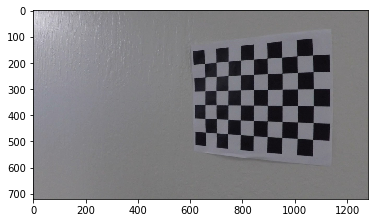

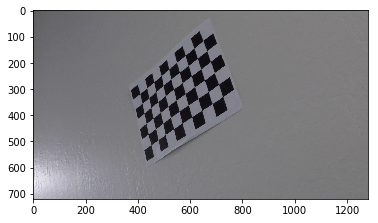

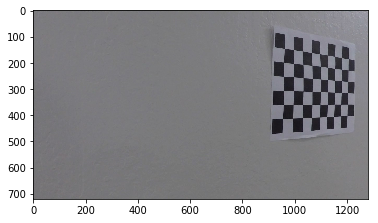

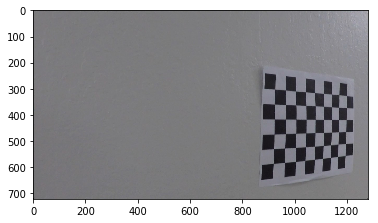

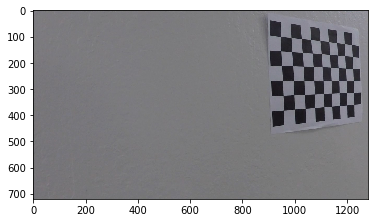

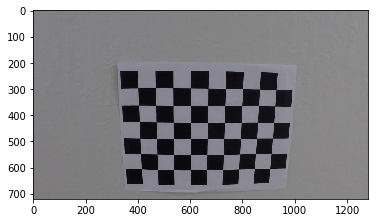

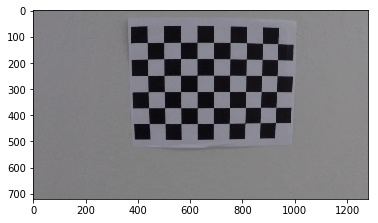

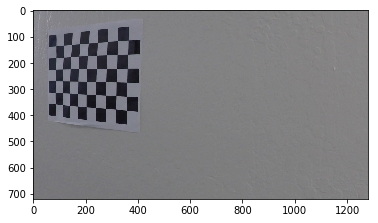

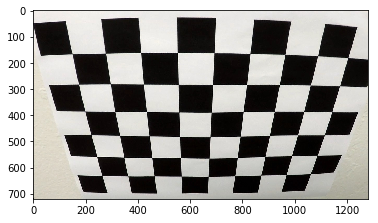

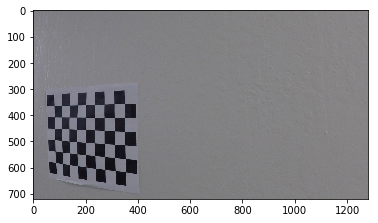

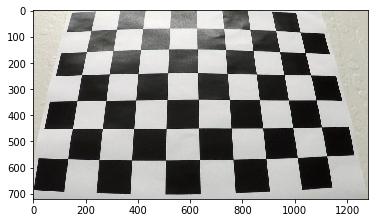

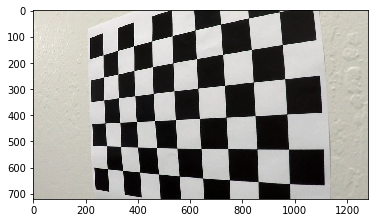

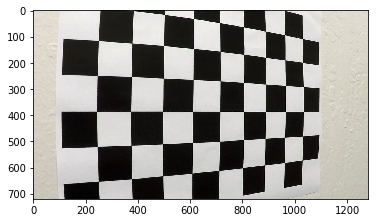

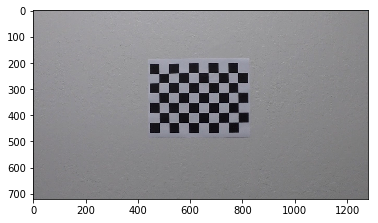

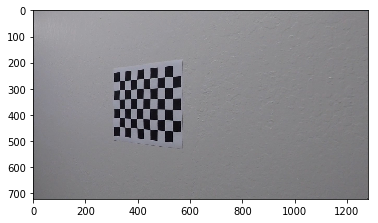

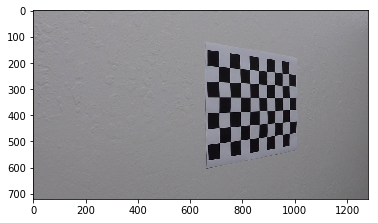

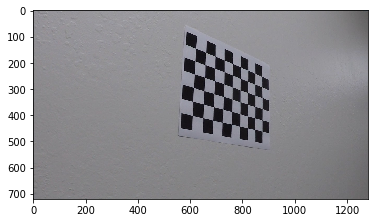

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import glob

# Read in images
cal_files = glob.glob('camera_cal/*.jpg')

cal_imgs = []
for file in cal_files:
    cal_imgs.append(mpimg.imread(file)) #RGB image
    

for img in cal_imgs:
    plt.figure()
    plt.imshow(img)


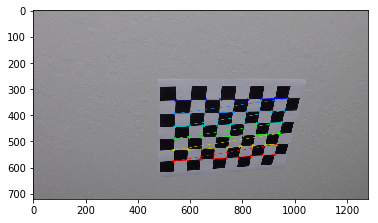

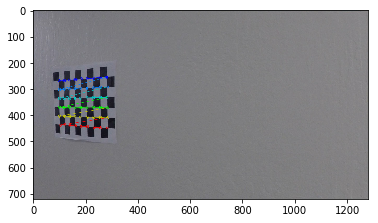

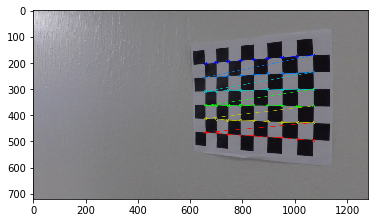

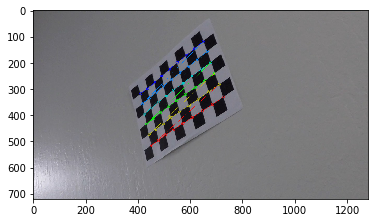

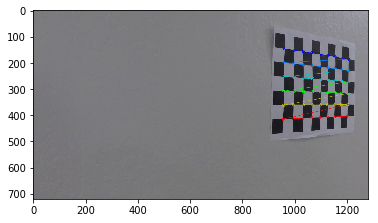

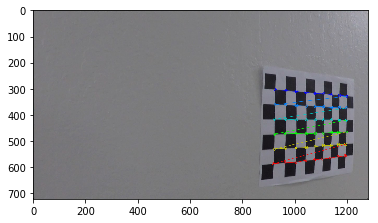

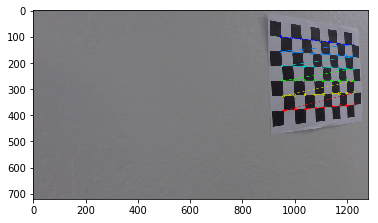

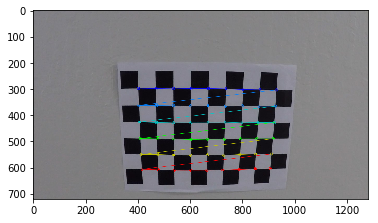

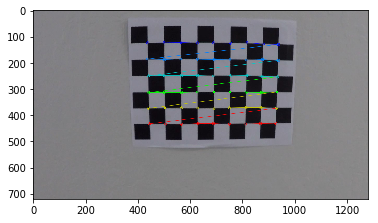

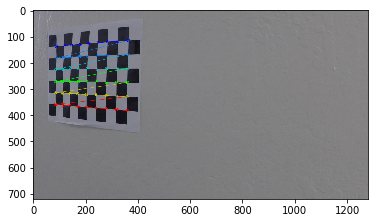

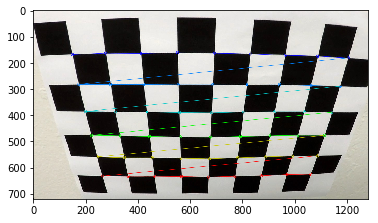

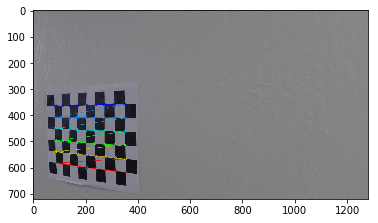

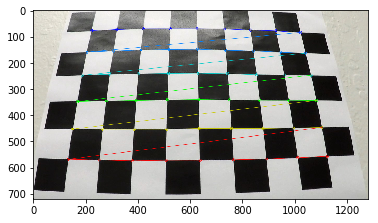

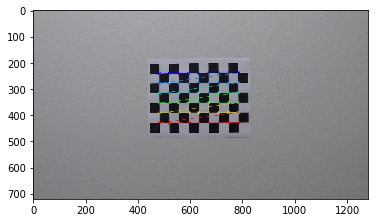

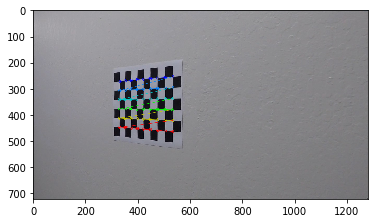

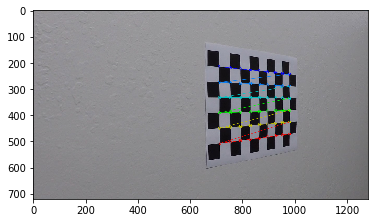

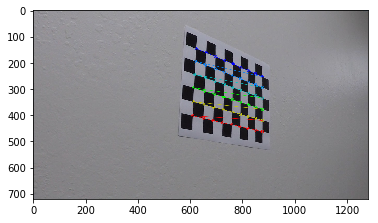

In [2]:

def undistort(imgs, nc = (9,6), plots = False):
    
    objpoints = []
    imgpoints = []
    
    objp = np.zeros((nc[0]*nc[1], 3))
    objp[:,:2] = np.mgrid[0:nc[0], 0:nc[1]].T.reshape(-1,2) 
    
    for img in imgs:
        # Convert to grayscale
        gray = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

        ret, corners = cv2.findChessboardCorners(gray, nc, None)

        if ret == True:
            imgpoints.append(corners)
            objpoints.append(objp)

            img = cv2.drawChessboardCorners(img, nc, corners, ret)
            plt.figure()
            plt.imshow(img)
    
    
    
    return objpoints, imgpoints

objpoints, imgpoints = undistort(cal_imgs)

In [5]:
print(imgpoints)


[array([[[ 545.32281494,  343.05032349]],

       [[ 602.67919922,  342.82681274]],

       [[ 660.09796143,  341.28921509]],

       [[ 715.83911133,  340.73129272]],

       [[ 770.56072998,  339.98654175]],

       [[ 823.46490479,  339.20251465]],

       [[ 874.27630615,  338.48022461]],

       [[ 925.06335449,  337.35388184]],

       [[ 972.56884766,  336.60717773]],

       [[ 542.59509277,  393.76373291]],

       [[ 600.19744873,  392.54690552]],

       [[ 655.3460083 ,  392.10684204]],

       [[ 711.13751221,  390.68212891]],

       [[ 763.534729  ,  388.46170044]],

       [[ 815.56463623,  387.05966187]],

       [[ 866.3972168 ,  385.45394897]],

       [[ 913.71691895,  384.51980591]],

       [[ 961.51293945,  382.39074707]],

       [[ 541.29772949,  443.60562134]],

       [[ 597.05865479,  441.94219971]],

       [[ 650.73400879,  440.41171265]],

       [[ 704.78216553,  437.89492798]],

       [[ 757.32250977,  435.96392822]],

       [[ 807.64978027,  432.8455

In [3]:
# Unwarp corners helper function

def corners_unwarp(img, nx, ny, mtx, dist):
    # Use the OpenCV undistort() function to remove distortion
    undist = cv2.undistort(img, mtx, dist, None, mtx)
    # Convert undistorted image to grayscale
    gray = cv2.cvtColor(undist, cv2.COLOR_BGR2GRAY)
    # Search for corners in the grayscaled image
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    if ret == True:
        # If we found corners, draw them! (just for fun)
        cv2.drawChessboardCorners(undist, (nx, ny), corners, ret)
        # Choose offset from image corners to plot detected corners
        # This should be chosen to present the result at the proper aspect ratio
        # My choice of 100 pixels is not exact, but close enough for our purpose here
        offset = 100 # offset for dst points
        # Grab the image shape
        img_size = (gray.shape[1], gray.shape[0])

        # For source points I'm grabbing the outer four detected corners
        src = np.float32([corners[0], corners[nx-1], corners[-1], corners[-nx]])
        # For destination points, I'm arbitrarily choosing some points to be
        # a nice fit for displaying our warped result 
        # again, not exact, but close enough for our purposes
        dst = np.float32([[offset, offset], [img_size[0]-offset, offset], 
                                     [img_size[0]-offset, img_size[1]-offset], 
                                     [offset, img_size[1]-offset]])
        # Given src and dst points, calculate the perspective transform matrix
        M = cv2.getPerspectiveTransform(src, dst)
        # Warp the image using OpenCV warpPerspective()
        warped = cv2.warpPerspective(undist, M, img_size)

    # Return the resulting image and matrix
    return warped, M
